In [23]:
!pip install --upgrade pip
!pip install --upgrade numpy
!pip install --upgrade matplotlib


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.8 MB 871.5 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.8 MB 1.4 MB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.8 MB 1.6 MB/s eta 0:00:01
   -------- ------------------------------- 0.4/1.8 MB 1.5 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/1.8 MB 1.6 MB/s eta 0:00:01
   ------------- -------------------------- 0.6/1.8 MB 1.7 MB/s eta 0:00:01
   --------------- ------------------------ 0.7/1.8 MB 1.8 MB/s eta 0:00:01
   ------------------ --------------------- 0.8/1.8 MB 2.0 MB/s eta 0:00:01
   ---------------------- ----------------- 1.0/1.8 MB 2.1 MB/s eta 0:00:01
   ------------------------- ---------

ERROR: To modify pip, please run the following command:
C:\Users\SHIVASHANKAR\anaconda3\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------------------- ------------ 41.0/61.0 kB 326.8 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 375.8 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 375.8 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 250.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.1 MB 3.8 MB/s eta 0:00:03
    --------------------------------------- 0.1/8.1 MB 1.4 MB/s eta 0:00:06
    --------------------------------------- 0.2/8.1 MB 1.3 MB/s eta 0:00:07
   - -------------------------------------- 0.2/8.1 MB 1.1 MB/s eta 0:00:07
   - ------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
streamlit 1.32.0 requires protobuf<5,>=3.20, but you have protobuf 6.33.1 which is incompatible.


<>:10: SyntaxWarning: invalid escape sequence '\P'
<>:10: SyntaxWarning: invalid escape sequence '\P'
C:\Users\SHIVASHANKAR\AppData\Local\Temp\ipykernel_3064\1188570875.py:10: SyntaxWarning: invalid escape sequence '\P'
  DATASET_DIR = "E:\Projects\X ray dataset\chest_xray"


Dataset path: E:\Projects\X ray dataset\chest_xray
Exists? -> True
Subfolders: ['test', 'train', 'val']
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Class indices: {'NORMAL': 0, 'PNEUMONIA': 1}
Sample batch X shape: (32, 224, 224, 3)
Sample batch y shape: (32,)


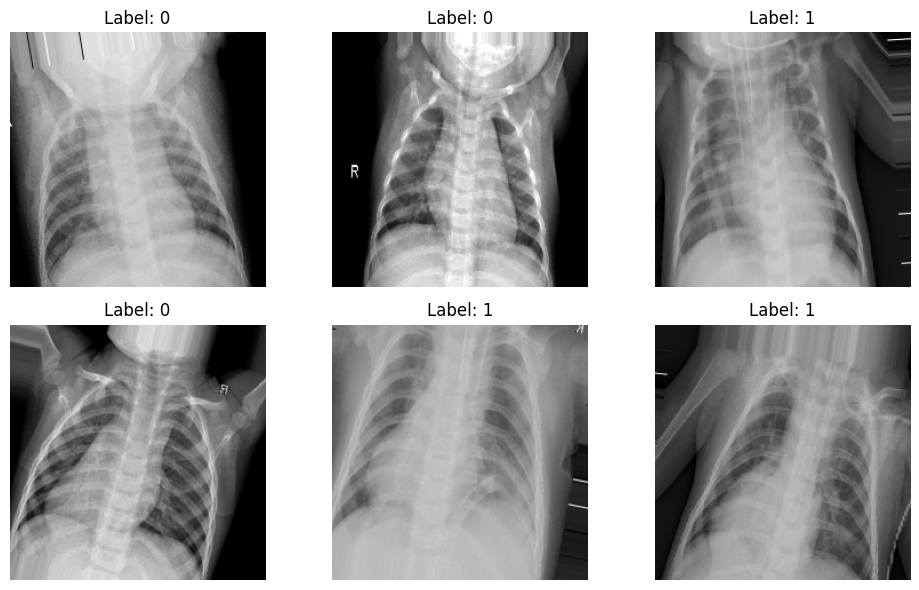

In [17]:
# 01_preprocessing_and_augmentation.py

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# ===== CONFIG =====
DATASET_DIR = "E:\Projects\X ray dataset\chest_xray"  
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

TRAIN_DIR = os.path.join(DATASET_DIR, "train")
VAL_DIR = os.path.join(DATASET_DIR, "val")
TEST_DIR = os.path.join(DATASET_DIR, "test")

print("Dataset path:", os.path.abspath(DATASET_DIR))
print("Exists? ->", os.path.exists(DATASET_DIR))
print("Subfolders:", os.listdir(DATASET_DIR))

ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator

# ===== DATA GENERATORS =====
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
)

val_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
)

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
)

val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False,
)

print("Class indices:", train_generator.class_indices)

# ===== CHECK A BATCH & VISUALIZE =====
x_batch, y_batch = next(train_generator)
print("Sample batch X shape:", x_batch.shape)
print("Sample batch y shape:", y_batch.shape)

plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.title(f"Label: {int(y_batch[i])}")
    plt.axis("off")
plt.tight_layout()
plt.show()


C:\Users\SHIVASHANKAR\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,784,769 (98.36 MB)

 Trainable params: 25,784,321 (98.36 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 284s 2s/step - accuracy: 0.7743 - loss: 1.7368 - val_accuracy: 0.5000 - val_loss: 28.3963
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 270s 2s/step - accuracy: 0.8516 - loss: 0.3206 - val_accuracy: 0.5000 - val_loss: 6.0519
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - accuracy: 0.8926 - loss: 0.2714 - val_accuracy: 0.5625 - val_loss: 4.5112
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.8878 - loss: 0.2872 - val_accuracy: 0.5000 - val_loss: 8.3797
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 279s 2s/step - accuracy: 0.8965 - loss: 0.2597 - val_accuracy: 0.5000 - val_loss: 3.5868


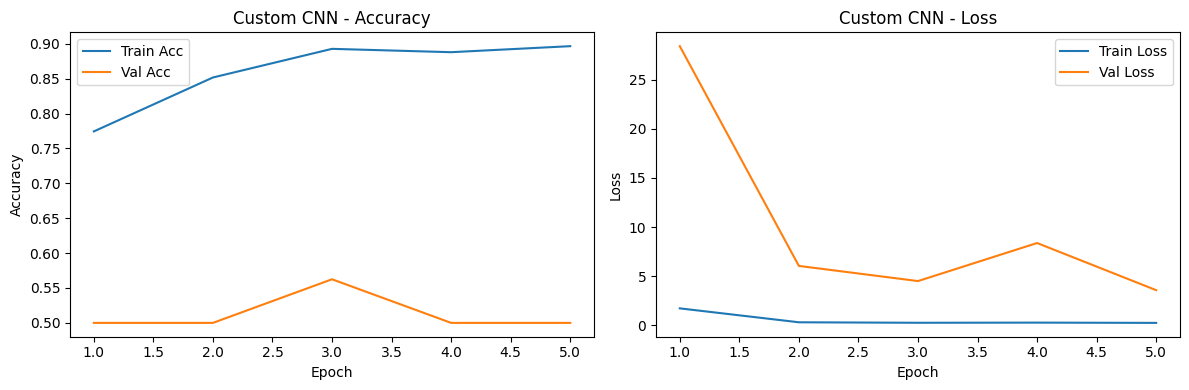

20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 802ms/step - accuracy: 0.6330 - loss: 2.3441
Test Loss: 2.3441
Test Accuracy: 0.6330
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 452ms/step


NameError: name 'confusion_matrix' is not defined

In [15]:
##custom CNN model

#  HYPERPARAMETERS 
OPTIMIZER_NAME = "adam"      #  "adam", "sgd", or anything else 
LEARNING_RATE = 0.001
EPOCHS = 5                 # adjust this to change number of epochs
DROPOUT_RATE = 0.5
IMAGE_SIZE = (224, 224)

# ===== OPTIMIZER =====
if OPTIMIZER_NAME == "adam":
    optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
elif OPTIMIZER_NAME == "sgd":
    optimizer = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE, momentum=0.9)
else:
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=LEARNING_RATE)

# ===== CUSTOM CNN =====
def build_custom_cnn(input_shape=(224, 224, 3), dropout_rate=0.5):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu",
                               padding="same", input_shape=input_shape),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ])
    return model

model = build_custom_cnn(
    input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
    dropout_rate=DROPOUT_RATE
)
model.compile(optimizer=optimizer, loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

# ===== TRAIN =====
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,
)


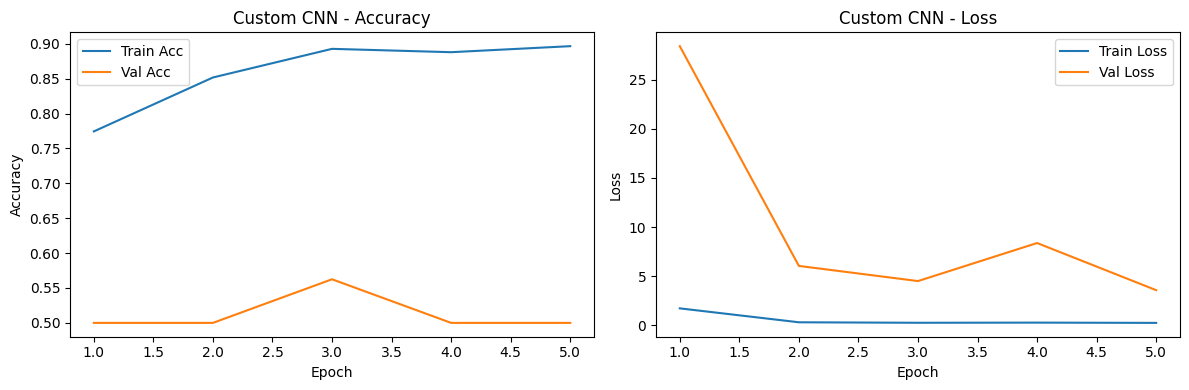

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 420ms/step - accuracy: 0.6330 - loss: 2.3441
Test Loss: 2.3441
Test Accuracy: 0.6330
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 457ms/step
Confusion Matrix:
 [[  5 229]
 [  0 390]]

Classification Report:
              precision    recall  f1-score   support

      NORMAL       1.00      0.02      0.04       234
   PNEUMONIA       0.63      1.00      0.77       390

    accuracy                           0.63       624
   macro avg       0.82      0.51      0.41       624
weighted avg       0.77      0.63      0.50       624

ROC-AUC: 0.9210


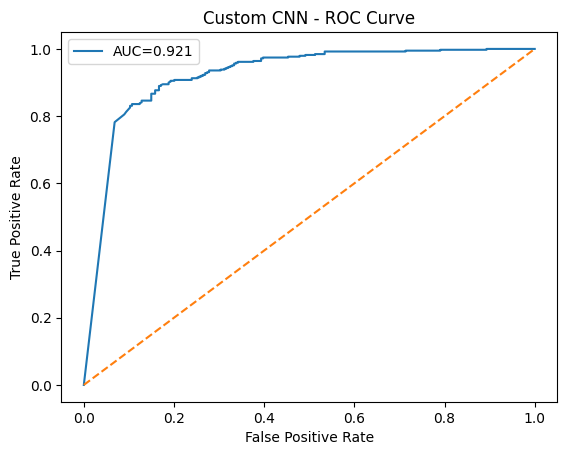

Saved as custom_cnn_model.h5


In [19]:
# ===== PLOT CURVES =====
def plot_curves(history, title_prefix="Custom CNN"):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label="Train Acc")
    plt.plot(epochs_range, val_acc, label="Val Acc")
    plt.title(f"{title_prefix} - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label="Train Loss")
    plt.plot(epochs_range, val_loss, label="Val Loss")
    plt.title(f"{title_prefix} - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_curves(history, "Custom CNN")

# ===== TEST EVALUATION =====
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

y_true = test_generator.classes
y_prob = model.predict(test_generator).ravel()
y_pred = (y_prob >= 0.5).astype(int)

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:")
print(classification_report(
    y_true, y_pred, target_names=list(test_generator.class_indices.keys())
))

try:
    roc_auc = roc_auc_score(y_true, y_prob)
    print(f"ROC-AUC: {roc_auc:.4f}")
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC={roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], "--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Custom CNN - ROC Curve")
    plt.legend()
    plt.show()
except Exception as e:
    print("ROC not computed:", e)

model.save("custom_cnn_model.h5")
print("Saved as custom_cnn_model.h5")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step

==== Training VGG16 ====
Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 471s 3s/step - accuracy: 0.7067 - loss: 0.6161 - val_accuracy: 0.5000 - val_loss: 0.7012
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 464s 3s/step - accuracy: 0.7498 - loss: 0.5198 - val_accuracy: 0.5625 - val_loss: 0.6331
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 435s 3s/step - accuracy: 0.7751 - loss: 0.4719 - val_accuracy: 0.6250 - val_loss: 0.5729
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 439s 3s/step - accuracy: 0.7972 - loss: 0.4310 - val_accuracy: 0.5625 - val_loss: 0.6352
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 438s 3s/step - accuracy: 0.8075 - loss: 0.4001 - val_accuracy: 0.6875 - val_loss: 0.5758


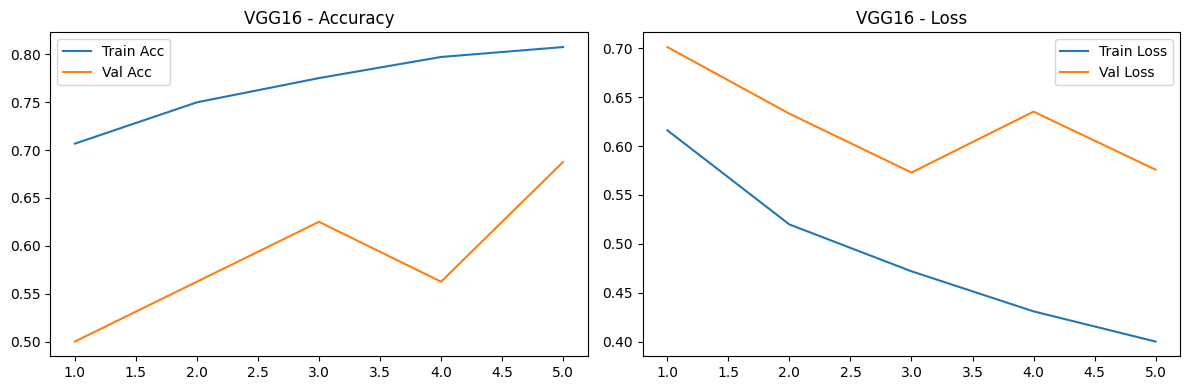

20/20 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.8157 - loss: 0.4405
VGG16 Test Loss: 0.4405
VGG16 Test Accuracy: 0.8157
20/20 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step


VGG16 Confusion Matrix:
 [[138  96]
 [ 19 371]]

VGG16 Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.88      0.59      0.71       234
   PNEUMONIA       0.79      0.95      0.87       390

    accuracy                           0.82       624
   macro avg       0.84      0.77      0.79       624
weighted avg       0.83      0.82      0.81       624

VGG16 saved as vgg16_model.h5
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 89s 1us/step

==== Training VGG19 ====
Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 561s 3s/step - accuracy: 0.6817 - loss: 0.6372 - val_accuracy: 0.5000 - val_loss: 0.8713
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 567s 3s/step - accuracy: 0.7427 - loss: 0.5394 - val_accuracy: 0.5000 - val_loss: 0.7808
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 589s 4s/step - accuracy: 0.7717 - loss: 0.4776 - val_accuracy: 0.5625 - val_loss: 0.7230
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 549s 3s/step - accuracy: 0.7841 - loss: 0.4463 - val_accuracy: 0

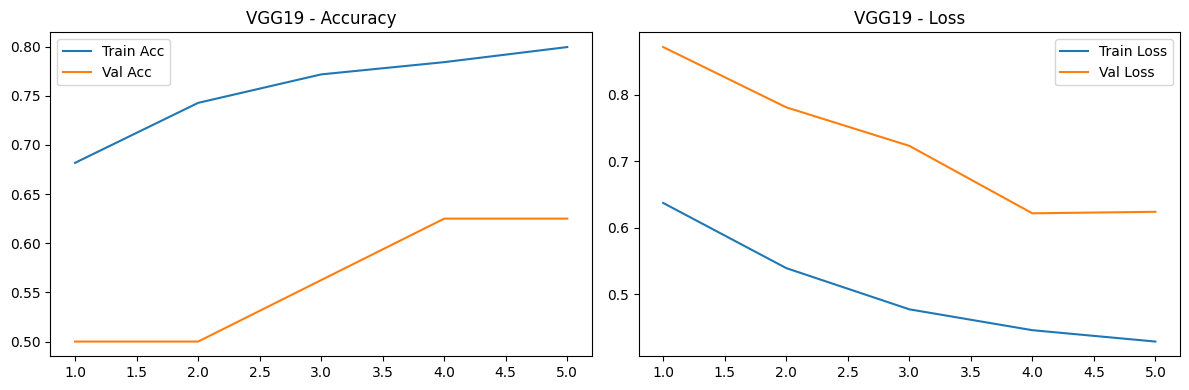

20/20 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.6971 - loss: 0.5336
VGG19 Test Loss: 0.5336
VGG19 Test Accuracy: 0.6971
20/20 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step


VGG19 Confusion Matrix:
 [[ 57 177]
 [ 12 378]]

VGG19 Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.83      0.24      0.38       234
   PNEUMONIA       0.68      0.97      0.80       390

    accuracy                           0.70       624
   macro avg       0.75      0.61      0.59       624
weighted avg       0.74      0.70      0.64       624

VGG19 saved as vgg19_model.h5

==== Test Accuracy Comparison (VGG) ====
VGG16: 0.8157
VGG19: 0.6971


In [21]:
#  VGG16 & VGG19 transfer learning

import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

## Hyper parameters 
EPOCHS = 5  ## adjust this 
LEARNING_RATE = 1e-4
DROPOUT_RATE = 0.5


def build_transfer_model(base_model, dropout_rate=0.5):
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    predictions = tf.keras.layers.Dense(1, activation="sigmoid")(x)
    model = tf.keras.Model(inputs=base_model.input, outputs=predictions)
    return model


def train_and_evaluate(model_name="VGG16"):
    if model_name == "VGG16":
        base = tf.keras.applications.VGG16(
            weights="imagenet",
            include_top=False,
            input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
        )
    else:
        base = tf.keras.applications.VGG19(
            weights="imagenet",
            include_top=False,
            input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
        )

    for layer in base.layers:
        layer.trainable = False

    model = build_transfer_model(base, dropout_rate=DROPOUT_RATE)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )

    print(f"\n==== Training {model_name} ====")
    history = model.fit(
        train_generator,
        epochs=EPOCHS,
        validation_data=val_generator,
    )

    # plots
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label="Train Acc")
    plt.plot(epochs_range, val_acc, label="Val Acc")
    plt.title(f"{model_name} - Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label="Train Loss")
    plt.plot(epochs_range, val_loss, label="Val Loss")
    plt.title(f"{model_name} - Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # test eval
    test_loss, test_acc = model.evaluate(test_generator)
    print(f"{model_name} Test Loss: {test_loss:.4f}")
    print(f"{model_name} Test Accuracy: {test_acc:.4f}")

    y_true = test_generator.classes
    y_prob = model.predict(test_generator).ravel()
    y_pred = (y_prob >= 0.5).astype(int)

    cm = confusion_matrix(y_true, y_pred)
    print(f"{model_name} Confusion Matrix:\n", cm)
    print(f"\n{model_name} Classification Report:")
    print(classification_report(
        y_true, y_pred, target_names=list(test_generator.class_indices.keys())
    ))

    filename = f"{model_name.lower()}_model.h5"
    model.save(filename)
    print(f"{model_name} saved as {filename}")
    return test_acc


acc_vgg16 = train_and_evaluate("VGG16")
acc_vgg19 = train_and_evaluate("VGG19")

print("\n==== Test Accuracy Comparison (VGG) ====")
print(f"VGG16: {acc_vgg16:.4f}")
print(f"VGG19: {acc_vgg19:.4f}")


In [29]:
!pip install gradio
import gradio
print(gradio.__version__)


6.0.1


In [47]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import pandas as pd

# Make sure these files exist in the current folder
model_files = {
    "Custom CNN": "custom_cnn_model.h5",
    "VGG16": "vgg16_model.h5",
    "VGG19": "vgg19_model.h5",
    "ResNet50": "resnet50_model.h5"
}

results = []
all_conf_mats = {}
all_class_reports = {}

# true labels (same for all models)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())
print("Class order in generator:", class_names)

for model_name, filename in model_files.items():
    print(f"\n==================== {model_name} ====================")
    print(f"Loading model from: {filename}")
    model = tf.keras.models.load_model(filename)

    # --- Test loss & accuracy ---
    test_generator.reset()
    loss, acc = model.evaluate(test_generator, verbose=0)
    print(f"{model_name} - Test Loss: {loss:.4f}")
    print(f"{model_name} - Test Accuracy: {acc:.4f}")

    # --- Predictions for confusion matrix & ROC-AUC ---
    test_generator.reset()
    y_prob = model.predict(test_generator, verbose=0).ravel()
    y_pred = (y_prob >= 0.5).astype(int)

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", cm)

    # Classification report (precision, recall, F1)
    cr = classification_report(
        y_true, y_pred,
        target_names=class_names,
        digits=4
    )
    print("\nClassification Report:\n", cr)

    # ROC–AUC
    try:
        auc = roc_auc_score(y_true, y_prob)
        print(f"ROC–AUC: {auc:.4f}")
    except Exception as e:
        auc = np.nan
        print("ROC–AUC could not be computed:", e)

    # Store for summary table
    results.append({
        "Model": model_name,
        "Test Loss": loss,
        "Test Accuracy": acc,
        "ROC–AUC": auc
    })
    all_conf_mats[model_name] = cm
    all_class_reports[model_name] = cr

# ==== Summary Table ====
df_results = pd.DataFrame(results)
print("\n\n===== Overall Model Comparison =====")
print(df_results.sort_values(by="Test Accuracy", ascending=False))

# (Optional) save table to CSV for your report
#df_results.to_csv("model_comparison_summary.csv", index=False)
#print("\nSaved summary to: model_comparison_summary.csv")


Class order in generator: ['NORMAL', 'PNEUMONIA']

==================== Custom CNN ====================
Loading model from: custom_cnn_model.h5


Custom CNN - Test Loss: 2.3441
Custom CNN - Test Accuracy: 0.6330
Confusion Matrix:
 [[  5 229]
 [  0 390]]

Classification Report:
               precision    recall  f1-score   support

      NORMAL     1.0000    0.0214    0.0418       234
   PNEUMONIA     0.6300    1.0000    0.7730       390

    accuracy                         0.6330       624
   macro avg     0.8150    0.5107    0.4074       624
weighted avg     0.7688    0.6330    0.4988       624

ROC–AUC: 0.9210

==================== VGG16 ====================
Loading model from: vgg16_model.h5


VGG16 - Test Loss: 0.4405
VGG16 - Test Accuracy: 0.8157
Confusion Matrix:
 [[138  96]
 [ 19 371]]

Classification Report:
               precision    recall  f1-score   support

      NORMAL     0.8790    0.5897    0.7059       234
   PNEUMONIA     0.7944    0.9513    0.8658       390

    accuracy                         0.8157       624
   macro avg     0.8367    0.7705    0.7858       624
weighted avg     0.8261    0.8157    0.8058       624

ROC–AUC: 0.9043

==================== VGG19 ====================
Loading model from: vgg19_model.h5


VGG19 - Test Loss: 0.5336
VGG19 - Test Accuracy: 0.6971
Confusion Matrix:
 [[ 57 177]
 [ 12 378]]

Classification Report:
               precision    recall  f1-score   support

      NORMAL     0.8261    0.2436    0.3762       234
   PNEUMONIA     0.6811    0.9692    0.8000       390

    accuracy                         0.6971       624
   macro avg     0.7536    0.6064    0.5881       624
weighted avg     0.7355    0.6971    0.6411       624

ROC–AUC: 0.8575

==================== ResNet50 ====================
Loading model from: resnet50_model.h5


ResNet50 - Test Loss: 0.6407
ResNet50 - Test Accuracy: 0.6250
Confusion Matrix:
 [[  0 234]
 [  0 390]]

Classification Report:
               precision    recall  f1-score   support

      NORMAL     0.0000    0.0000    0.0000       234
   PNEUMONIA     0.6250    1.0000    0.7692       390

    accuracy                         0.6250       624
   macro avg     0.3125    0.5000    0.3846       624
weighted avg     0.3906    0.6250    0.4808       624

ROC–AUC: 0.8373


===== Overall Model Comparison =====
        Model  Test Loss  Test Accuracy   ROC–AUC
1       VGG16   0.440491       0.815705  0.904306
2       VGG19   0.533612       0.697115  0.857495
0  Custom CNN   2.344142       0.633013  0.920979
3    ResNet50   0.640699       0.625000  0.837267


C:\Users\SHIVASHANKAR\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SHIVASHANKAR\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SHIVASHANKAR\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
import os
print(os.listdir())


[' X ray classificaion using deep learning.ipynb', '.anaconda', '.conda', '.condarc', '.continuum', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '.spyder-py3', '.vscode', 'anaconda3', 'Annual rainfall data.xlsx', 'ansel', 'AppData', 'Application Data', 'Bike Price prediction.ipynb', 'Cardiofocus_revenue.ipynb', 'cd', 'conda', 'Contacts', 'Cookies', 'Crop reccomendation models.ipynb', 'custom_cnn_model.h5', 'D', 'Downloads', 'Favorites', 'Jedi', 'Links', 'Local Settings', 'mobilenetv2_model.h5', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{efcc7dcd-e243-11ef-a99b-996427b6e52c}.TM.blf', 'NTUSER.DAT{efcc7dcd-e243-11ef-a99b-996427b6e52c}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{efcc7dcd-e243-11ef-a99b-996427b6e52c}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'PrintHood', 'Recent', 'resnet50_model.h5', 'Saved Games', 'Searches', 'SendTo', 'Start Menu', 'Te

In [37]:
MODEL_PATH = "resnet50_model.h5"
MODEL_PATH = "vgg19_model.h5"
MODEL_PATH = "custom_cnn_model.h5"
MODEL_PATH = "vgg16_model.h5"


In [48]:
import numpy as np
from PIL import Image
import tensorflow as tf
import gradio as gr

print("TensorFlow version:", tf.__version__)
print("Gradio version:", gr.__version__)

#  SELECT YOUR MODEL HERE
MODEL_PATH = "vgg16_model.h5"   #  "custom_cnn_model.h5" OR "vgg19_model.h5" OR "resnet50_model.h5"

IMAGE_SIZE = (224, 224)
CLASS_NAMES = ["NORMAL", "PNEUMONIA"]


# Load model
try:
    model = tf.keras.models.load_model(MODEL_PATH)
    print(f" Loaded model from: {MODEL_PATH}")
except Exception as e:
    print(" Error loading model:")
    print(e)
    raise


def preprocess_image(image: Image.Image):
    image = image.convert("RGB")
    image = image.resize(IMAGE_SIZE)
    arr = tf.keras.preprocessing.image.img_to_array(image)
    arr = arr / 255.0
    arr = np.expand_dims(arr, axis=0)
    return arr


def predict(image: Image.Image):
    if image is None:
        return "No image uploaded", 0.0

    x = preprocess_image(image)
    prob = float(model.predict(x)[0][0])

    if prob >= 0.5:
        label = CLASS_NAMES[1]
        confidence = prob
    else:
        label = CLASS_NAMES[0]
        confidence = 1.0 - prob

    return f"Prediction: {label}", confidence


with gr.Blocks() as demo:
    gr.Markdown("## Chest X-Ray Classifier (Normal vs Pneumonia)")

    with gr.Row():
        img_input = gr.Image(type="pil", label="Upload Chest X-Ray")
        output_label = gr.Textbox(label="Prediction")
        output_conf = gr.Number(label="Confidence")

    submit_btn = gr.Button("Classify")
    submit_btn.click(fn=predict, inputs=img_input, outputs=[output_label, output_conf])

demo.launch(share=True)


TensorFlow version: 2.20.0
Gradio version: 6.0.1


 Loaded model from: vgg16_model.h5
* Running on local URL:  http://127.0.0.1:7862

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


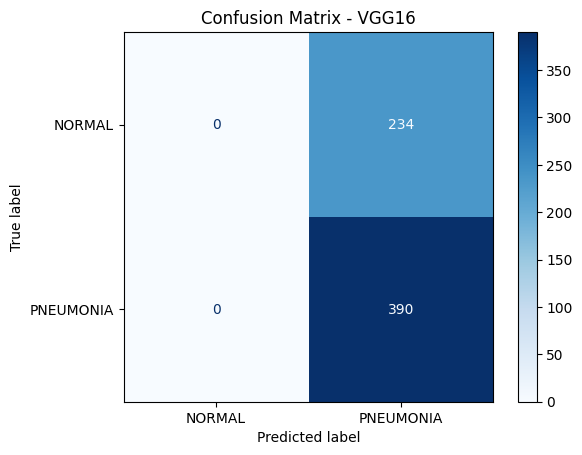

In [67]:
## confusion matrix ##

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

## b. VGG16
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=test_generator.class_indices.keys())
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - VGG16")  # change per model
plt.show()

